<a href="https://colab.research.google.com/github/ganesh3/pytorch-work/blob/master/Transformers_code_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

### Positional Encoding

What is d_model and max_seq_len?

d_model is size of the vector for each input word or character whereas max_seq_len (max sequence length) is the total length of the input words or characters.

In [2]:
max_seq_len = 10
d_model = 6

In [3]:
even_i = torch.arange(0, d_model, 2).float()
odd_i = torch.arange(1, d_model, 2).float()

In [4]:
even_i, odd_i

(tensor([0., 2., 4.]), tensor([1., 3., 5.]))

In [5]:
even_denominator = torch.pow(10000, even_i/d_model)
odd_denominator = torch.pow(10000, (odd_i - 1)/d_model)

In [6]:
even_denominator, odd_denominator

(tensor([  1.0000,  21.5443, 464.1590]),
 tensor([  1.0000,  21.5443, 464.1590]))

even_denominator and odd_denominator are the same. Hence, we can use any one of the them and call it a denominator.

In [7]:
even_denominator.shape

torch.Size([3])

In [8]:
denominator = even_denominator

In [9]:
position = torch.arange(max_seq_len, dtype=torch.float).reshape(max_seq_len, 1)

In [10]:
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [11]:
# the value of the position divided by denominator are calculated as below using division and not inverse.
0/1, 1/1, 1/21.5443, 1/464.1590, 2/1, 2/21.5443, 2/464.1590

(0.0,
 1.0,
 0.04641598938002163,
 0.0021544341486430295,
 2.0,
 0.09283197876004326,
 0.004308868297286059)

In [12]:
position.shape, denominator.shape, position/denominator

(torch.Size([10, 1]),
 torch.Size([3]),
 tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.0000e+00, 4.6416e-02, 2.1544e-03],
         [2.0000e+00, 9.2832e-02, 4.3089e-03],
         [3.0000e+00, 1.3925e-01, 6.4633e-03],
         [4.0000e+00, 1.8566e-01, 8.6177e-03],
         [5.0000e+00, 2.3208e-01, 1.0772e-02],
         [6.0000e+00, 2.7850e-01, 1.2927e-02],
         [7.0000e+00, 3.2491e-01, 1.5081e-02],
         [8.0000e+00, 3.7133e-01, 1.7235e-02],
         [9.0000e+00, 4.1774e-01, 1.9390e-02]]))

In [13]:
torch.div(position, denominator)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 4.6416e-02, 2.1544e-03],
        [2.0000e+00, 9.2832e-02, 4.3089e-03],
        [3.0000e+00, 1.3925e-01, 6.4633e-03],
        [4.0000e+00, 1.8566e-01, 8.6177e-03],
        [5.0000e+00, 2.3208e-01, 1.0772e-02],
        [6.0000e+00, 2.7850e-01, 1.2927e-02],
        [7.0000e+00, 3.2491e-01, 1.5081e-02],
        [8.0000e+00, 3.7133e-01, 1.7235e-02],
        [9.0000e+00, 4.1774e-01, 1.9390e-02]])

In [14]:
even_PE = torch.sin(position/denominator)
odd_PE = torch.cos(position/denominator)

In [15]:
even_PE, odd_PE

(tensor([[ 0.0000,  0.0000,  0.0000],
         [ 0.8415,  0.0464,  0.0022],
         [ 0.9093,  0.0927,  0.0043],
         [ 0.1411,  0.1388,  0.0065],
         [-0.7568,  0.1846,  0.0086],
         [-0.9589,  0.2300,  0.0108],
         [-0.2794,  0.2749,  0.0129],
         [ 0.6570,  0.3192,  0.0151],
         [ 0.9894,  0.3629,  0.0172],
         [ 0.4121,  0.4057,  0.0194]]),
 tensor([[ 1.0000,  1.0000,  1.0000],
         [ 0.5403,  0.9989,  1.0000],
         [-0.4161,  0.9957,  1.0000],
         [-0.9900,  0.9903,  1.0000],
         [-0.6536,  0.9828,  1.0000],
         [ 0.2837,  0.9732,  0.9999],
         [ 0.9602,  0.9615,  0.9999],
         [ 0.7539,  0.9477,  0.9999],
         [-0.1455,  0.9318,  0.9999],
         [-0.9111,  0.9140,  0.9998]]))

In [16]:
even_PE.shape, odd_PE.shape

(torch.Size([10, 3]), torch.Size([10, 3]))

In [17]:
stacked = torch.stack([even_PE, odd_PE], dim=2)

In [18]:
stacked.shape

torch.Size([10, 3, 2])

In [19]:
stacked

tensor([[[ 0.0000,  1.0000],
         [ 0.0000,  1.0000],
         [ 0.0000,  1.0000]],

        [[ 0.8415,  0.5403],
         [ 0.0464,  0.9989],
         [ 0.0022,  1.0000]],

        [[ 0.9093, -0.4161],
         [ 0.0927,  0.9957],
         [ 0.0043,  1.0000]],

        [[ 0.1411, -0.9900],
         [ 0.1388,  0.9903],
         [ 0.0065,  1.0000]],

        [[-0.7568, -0.6536],
         [ 0.1846,  0.9828],
         [ 0.0086,  1.0000]],

        [[-0.9589,  0.2837],
         [ 0.2300,  0.9732],
         [ 0.0108,  0.9999]],

        [[-0.2794,  0.9602],
         [ 0.2749,  0.9615],
         [ 0.0129,  0.9999]],

        [[ 0.6570,  0.7539],
         [ 0.3192,  0.9477],
         [ 0.0151,  0.9999]],

        [[ 0.9894, -0.1455],
         [ 0.3629,  0.9318],
         [ 0.0172,  0.9999]],

        [[ 0.4121, -0.9111],
         [ 0.4057,  0.9140],
         [ 0.0194,  0.9998]]])

In [20]:
PE = torch.flatten(stacked, start_dim=1, end_dim=2)
PE

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

In [21]:
PE.shape

torch.Size([10, 6])

## Class Creation for positional encoding

In [22]:
class PositionalEncoding(nn.Module):
  def __init__(self, max_seq_len, d_model):
    super().__init__()
    self.max_seq_len = max_seq_len
    self.d_model = d_model

  def forward(self):
    even_i = torch.arange(0, self.d_model, 2).float()
    denominator = torch.pow(10000, even_i/d_model)
    position = torch.arange(self.max_seq_len, dtype=torch.float).reshape(self.max_seq_len, 1)
    even_PE = torch.sin(position/denominator)
    odd_PE = torch.cos(position/denominator)
    stacked = torch.stack([even_PE, odd_PE], dim=2)
    PE = torch.flatten(stacked, start_dim=1, end_dim=2)
    return PE

In [23]:
pe = PositionalEncoding(d_model=6, max_seq_len=10)
pe.forward()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

In [24]:
pe

PositionalEncoding()

### Self Attention

In [25]:
import numpy as np
import math

In [26]:
# Generate Data for query, key, and value vectors
L, d_k, d_v = 4, 8, 8
q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

In [27]:
q, q.shape

(array([[-0.18185525,  1.20285346,  0.84895926, -1.85361658,  0.3067406 ,
         -1.15625659, -0.32583117,  1.98205115],
        [-0.11040212, -0.12054249,  0.16393633,  0.31795924, -0.1098013 ,
         -0.16196023,  0.515932  ,  1.73909573],
        [ 0.57051295, -1.55103972,  1.26124308, -0.52197073,  0.07943291,
          0.81313755, -0.93452796, -0.01305509],
        [-1.36582104, -2.36551209, -2.01065348, -0.57098784, -0.59060721,
         -1.3934979 , -0.61325846,  0.51319789]]),
 (4, 8))

In [28]:
k, k.shape

(array([[ 0.23496844,  0.24754314,  0.16154535,  0.64276261, -1.04349571,
          0.51490801,  0.44673368, -0.44048445],
        [ 0.61871625, -1.49159477,  0.87705042,  0.58481099,  2.87007328,
          1.11323109, -0.63494364, -0.11069473],
        [ 0.44062828, -1.01982783, -0.29843286, -1.14346986,  0.38451584,
          0.45089043, -2.41305085,  0.54940015],
        [ 0.44769648,  0.0138322 ,  0.53586962, -0.74420718,  1.72422598,
          0.14949841, -0.91771104, -1.60779412]]),
 (4, 8))

In [29]:
v, v.shape

(array([[ 1.20545246, -0.1180561 , -1.52660273,  0.02147769, -0.16144093,
          0.20391106,  0.52396854,  0.9272886 ],
        [-0.43832067, -1.08375072,  0.51076884,  0.05280151, -0.10517605,
          0.34501719, -1.76393002, -0.22765087],
        [-1.0278198 ,  1.38001859, -1.34983878,  0.63331007, -0.08606777,
          0.77282203, -1.54744266,  1.51447704],
        [-0.36648509,  0.23237707, -1.03977619, -0.24762045,  0.39092937,
          0.9479824 , -0.67053554,  0.72928491]]),
 (4, 8))

$$
\text { self attention }=\operatorname{softmax}\left(\frac{Q \cdot K^T}{\sqrt{d_k}}+M\right)
$$


$$
\text { new } \mathrm{V}= self attention. V
$$

In [30]:
np.matmul(q, k.T)

array([[-2.73333288, -2.66545297,  2.03115133, -0.76205133],
       [-0.32930288, -0.57431396, -0.74297185, -3.68299247],
       [-0.45758343,  5.19543392,  4.69870921,  2.43541814],
       [-2.19955854, -2.32782954,  3.96991028, -2.78569689]])

In [31]:
# Why we need sqrt(d_k) in denominator?

q.var(), k.var(), np.matmul(q, k.T).var()

(1.0777683180599649, 1.013878680220582, 7.6731776585516105)

In [32]:
scaled = np.matmul(q, k.T)/math.sqrt(d_k)

In [33]:
# Notice the reduction in variance of the 'scaled' or the 'np.matmul product' vector i.e. 5.4557 vs 0.6819
q.var(), k.var(), scaled.var()

(1.0777683180599649, 1.013878680220582, 0.959147207318951)

In [34]:
scaled

array([[-0.96637911, -0.94237994,  0.71812044, -0.26942583],
       [-0.11642615, -0.20305065, -0.26268022, -1.30213448],
       [-0.16178017,  1.83686328,  1.66124457,  0.86105034],
       [-0.77766138, -0.82301203,  1.40357524, -0.98489258]])

#### Masking


1. This is to ensure words don't get context from words generated in the future.
2. Not required in the encoders, but required in the decoders


In [35]:
mask = np.tril(np.ones((L, L)))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [36]:
mask[mask == 0] = - np.infty
mask[mask == 1] = 0

In [37]:
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [38]:
scaled + mask

array([[-0.96637911,        -inf,        -inf,        -inf],
       [-0.11642615, -0.20305065,        -inf,        -inf],
       [-0.16178017,  1.83686328,  1.66124457,        -inf],
       [-0.77766138, -0.82301203,  1.40357524, -0.98489258]])

#### Softmax

$\operatorname{softmax}=\frac{e^{x_i}}{\sum_j e_j^x}$

In [39]:
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

In [40]:
attention = softmax(scaled + mask)

In [41]:
#softmax is applied so that the infinity values become zero and essentially acts as an unknown for the model to predict i.e. the next word or character
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.52164259, 0.47835741, 0.        , 0.        ],
       [0.06863609, 0.50646841, 0.4248955 , 0.        ],
       [0.08601598, 0.08220223, 0.76186527, 0.06991652]])

In [42]:
new_v = np.matmul(attention, v)

In [43]:
new_v

array([[ 1.20545246, -0.1180561 , -1.52660273,  0.02147769, -0.16144093,
         0.20391106,  0.52396854,  0.9272886 ],
       [ 0.41914141, -0.58000327, -0.55201095,  0.03646167, -0.13452621,
         0.27141023, -0.57046468,  0.37481475],
       [-0.57597403,  0.02937527, -0.41963218,  0.29730704, -0.10091883,
         0.51710457, -1.5149131 ,  0.59184196],
       [-0.74102633,  0.96839379, -1.19041871,  0.47137202, -0.06077183,
         0.70096668, -1.32575365,  1.26586475]])

In [44]:
v

array([[ 1.20545246, -0.1180561 , -1.52660273,  0.02147769, -0.16144093,
         0.20391106,  0.52396854,  0.9272886 ],
       [-0.43832067, -1.08375072,  0.51076884,  0.05280151, -0.10517605,
         0.34501719, -1.76393002, -0.22765087],
       [-1.0278198 ,  1.38001859, -1.34983878,  0.63331007, -0.08606777,
         0.77282203, -1.54744266,  1.51447704],
       [-0.36648509,  0.23237707, -1.03977619, -0.24762045,  0.39092937,
         0.9479824 , -0.67053554,  0.72928491]])

In [45]:
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask=None):
  d_k = q.shape[-1]
  scaled = np.matmul(q, k.T) / math.sqrt(d_k)
  if mask is not None:
    scaled = scaled + mask

  attention = softmax(scaled)
  out = np.matmul(attention, v)

  return out, attention

In [46]:
values, attention = scaled_dot_product_attention(q, k, v, mask=mask)

In [47]:
v, values, attention

(array([[ 1.20545246, -0.1180561 , -1.52660273,  0.02147769, -0.16144093,
          0.20391106,  0.52396854,  0.9272886 ],
        [-0.43832067, -1.08375072,  0.51076884,  0.05280151, -0.10517605,
          0.34501719, -1.76393002, -0.22765087],
        [-1.0278198 ,  1.38001859, -1.34983878,  0.63331007, -0.08606777,
          0.77282203, -1.54744266,  1.51447704],
        [-0.36648509,  0.23237707, -1.03977619, -0.24762045,  0.39092937,
          0.9479824 , -0.67053554,  0.72928491]]),
 array([[ 1.20545246, -0.1180561 , -1.52660273,  0.02147769, -0.16144093,
          0.20391106,  0.52396854,  0.9272886 ],
        [ 0.41914141, -0.58000327, -0.55201095,  0.03646167, -0.13452621,
          0.27141023, -0.57046468,  0.37481475],
        [-0.57597403,  0.02937527, -0.41963218,  0.29730704, -0.10091883,
          0.51710457, -1.5149131 ,  0.59184196],
        [-0.74102633,  0.96839379, -1.19041871,  0.47137202, -0.06077183,
          0.70096668, -1.32575365,  1.26586475]]),
 array([[1. 

### Multi head Attention

In [48]:
import torch.nn.functional as F

In [49]:
# sequence length is the length of input sequence
sequence_length = 4
#batch size is the size of the batch passed to the dataloader for processing
batch_size = 1
# output of the attention unit for every word
d_model = 512
#input dimension is the size of the input dimension for each word or character
# i.e. If the sentence is 'I live in India' then the dimension to represent each word like 'I', 'live', 'in', 'India' is of size 512
input_dim = 512

In [50]:
# the x value below is the value post the positional encoding step and is an input to the multi head attention step of the encoder
x = torch.randn(batch_size, sequence_length, d_model)

In [51]:
x.size()

torch.Size([1, 4, 512])

In [52]:
# multiplied by 3 in order to have q, k, v vectors using d_model
qkv_layer = nn.Linear(input_dim, 3 * d_model)

In [53]:
qkv = qkv_layer(x)

In [54]:
qkv.shape

torch.Size([1, 4, 1536])

In [55]:
import matplotlib.pyplot as plt

In [56]:
yval = torch.histc(qkv, bins=200, min=-3, max=3)
xval = np.arange(-1, 1, 0.01) *3

Text(0.5, 1.0, 'QKV Distribution')

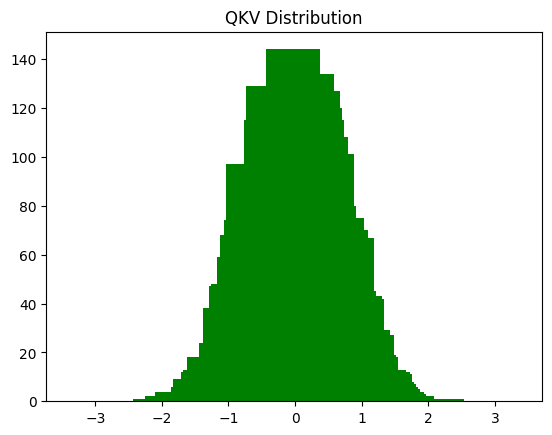

In [57]:
plt.bar(xval, yval, align='center', color=['green'])
plt.title('QKV Distribution')

In [58]:
num_heads = 8
head_dim = d_model // num_heads
qkv = qkv.reshape(batch_size, sequence_length, num_heads, 3 * head_dim)

In [59]:
qkv.shape

torch.Size([1, 4, 8, 192])

In [60]:
# [batch_size, num_heads, sequence_length, 3*head_dim]
qkv = qkv.permute(0, 2, 1, 3)

In [61]:
qkv.shape

torch.Size([1, 8, 4, 192])

In [62]:
q, k, v = qkv.chunk(3, dim = -1)
q.shape, k.shape, v.shape

(torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]))

#### Self attention for multiple heads

$$
\text { self attention }=\operatorname{softmax}\left(\frac{Q \cdot K^T}{\sqrt{d_k}}+M\right)
$$


$$
\text { new } \mathrm{V}= self attention. V
$$

In [63]:
d_k - q.shape[-1]
scaled = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(d_k)
scaled.shape

torch.Size([1, 8, 4, 4])

In [64]:
k.T.shape

<ipython-input-64-879c2705464e>:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  k.T.shape


torch.Size([64, 4, 8, 1])

In [65]:
y = torch.randn(2, 3)
y.shape

torch.Size([2, 3])

In [66]:
y

tensor([[-2.6678, -0.1673, -0.9192],
        [-0.5707,  0.3481, -0.1764]])

In [67]:
y.transpose(0, 1)

tensor([[-2.6678, -0.5707],
        [-0.1673,  0.3481],
        [-0.9192, -0.1764]])

In [68]:
y.transpose(1, 0)

tensor([[-2.6678, -0.5707],
        [-0.1673,  0.3481],
        [-0.9192, -0.1764]])

In [69]:
k.transpose(-1, -2) == k.transpose(-2, -1)

tensor([[[[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         ...,

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, 

In [70]:
k.transpose(-1, -2).shape

torch.Size([1, 8, 64, 4])

In [71]:
mask = torch.full(scaled.size(), float('-inf'))
mask

tensor([[[[-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf]],

         [[-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf]],

         [[-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf]],

         [[-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf]],

         [[-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf]],

         [[-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf]],

         [[-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf,

In [72]:
mask = torch.triu(mask, diagonal=1)
mask

tensor([[[[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0.,

In [73]:
mask[0][1], mask.shape

(tensor([[0., -inf, -inf, -inf],
         [0., 0., -inf, -inf],
         [0., 0., 0., -inf],
         [0., 0., 0., 0.]]),
 torch.Size([1, 8, 4, 4]))

In [74]:
(scaled+mask)[0][0]

tensor([[ 0.9914,    -inf,    -inf,    -inf],
        [ 1.1568,  1.7453,    -inf,    -inf],
        [-0.5933, -0.1951, -0.6222,    -inf],
        [ 0.7502, -1.8816,  1.5439,  1.2009]], grad_fn=<SelectBackward0>)

In [75]:
scaled += mask

In [76]:
attention = F.softmax(scaled, dim=-1)

In [77]:
attention.shape

torch.Size([1, 8, 4, 4])

In [78]:
attention[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.3570, 0.6430, 0.0000, 0.0000],
        [0.2890, 0.4303, 0.2807, 0.0000],
        [0.2061, 0.0148, 0.4557, 0.3234]], grad_fn=<SelectBackward0>)

In [79]:
values = torch.matmul(attention, v)
values.shape

torch.Size([1, 8, 4, 64])

#### Function

In [80]:
def scaled_dot_product(q, k, v, mask=None):
  d_k = q.size()[-1]
  scaled = torch.matmul(q, k.transpose(-2,-1)) / math.sqrt(d_k)
  if mask is not None:
    scaled += mask
  attention = F.softmax(scaled, dim=-1)
  values = torch.matmul(attention, v)
  return values, attention

In [81]:
values, attention = scaled_dot_product(q, k, v, mask=mask)

In [82]:
attention.shape

torch.Size([1, 8, 4, 4])

In [83]:
attention[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.4482, 0.5518, 0.0000, 0.0000],
        [0.3184, 0.3665, 0.3151, 0.0000],
        [0.2570, 0.1014, 0.3403, 0.3014]], grad_fn=<SelectBackward0>)

In [84]:
values.size() #for every batch, head, sequence of word, the value vector of size 64

torch.Size([1, 8, 4, 64])

In [85]:
# combine all the heads together to match the input dimension
values = values.reshape(batch_size, sequence_length, num_heads * head_dim)
values.shape

torch.Size([1, 4, 512])

In [86]:
# heads can learn from each other and hence a feedforward linear layer
linear_layer = nn.Linear(d_model, d_model)

In [87]:
out = linear_layer(values)
out.shape

torch.Size([1, 4, 512])

In [88]:
# much more context aware than the input
out

tensor([[[-0.2441, -0.2797,  0.3715,  ..., -0.1083, -0.5153,  0.1653],
         [ 0.0529, -0.2232, -0.0598,  ..., -0.3440,  0.1075, -0.1082],
         [-0.2864,  0.2092, -0.3389,  ..., -0.4216, -0.2365, -0.3041],
         [-0.0094, -0.2157,  0.4775,  ...,  0.0918,  0.3671,  0.1379]]],
       grad_fn=<ViewBackward0>)

#### Class

In [89]:
def scaled_dot_product(q, k, v, mask=None):
  d_k = q.size()[-1]
  scaled = torch.matmul(q, k.transpose(-2,-1)) / math.sqrt(d_k)
  if mask is not None:
    scaled += mask
  attention = F.softmax(scaled, dim=-1)
  values = torch.matmul(attention, v)
  return values, attention

class MultiheadAttention(nn.Module):
  def __init__(self, input_dim, d_model, num_heads):
    super().__init__()
    self.input_dim = input_dim
    self.d_model = d_model
    self.num_heads = num_heads
    self.head_dim = d_model // num_heads
    self.qkv_layer = nn.Linear(input_dim, 3 * d_model)
    self.linear_layer = nn.Linear(d_model, d_model)

  def forward(self, x, mask=None):
    batch_size, sequence_length, input_dim = x.size() # 30 x 200 x 512
    print(f"x.size(): {x.size()}")
    qkv = self.qkv_layer(x) # 30 x 200 x 1536
    print(f"qkv.size(): {qkv.size()}")
    qkv = qkv.reshape(batch_size, sequence_length, self.num_heads, 3 * self.head_dim) # 30 x 200 x 8 x 192
    print(f"qkv.size(): {qkv.size()}")
    qkv = qkv.permute(0, 2, 1, 3) # 30 x 8 x 200 x 192
    print(f"qkv.size(): {qkv.size()}")
    q, k, v = torch.chunk(qkv, 3, dim=-1) # q: 30 x 8 x 200 x 64, k: 30 x 8 x 200 x 64, v: 30 x 8 x 200 x 64
    print(f"q.size(): {q.size()} , k.size(): {k.size()}, v.size(): {v.size()}")
    values, attention = scaled_dot_product(q, k, v, mask) # values: 30 x 8 x 200 x 64
    print(f"values.size(): {values.size()}, attention.size:{ attention.size()} ")
    values = values.reshape(batch_size, sequence_length, self.num_heads * self.head_dim)# 30 x 200 x 512
    print(f"values.size(): {values.size()}")
    out = self.linear_layer(values) # 30 x 200 x 512
    print(f"out.size(): {out.size()}")
    return out # 30 x 200 x 512

#### Input

In [90]:
input_dim = 1024
d_model = 512
num_heads = 8

batch_size = 30
sequence_length = 5

In [91]:
x = torch.randn((batch_size, sequence_length, input_dim))
x.shape

torch.Size([30, 5, 1024])

In [92]:
model = MultiheadAttention(input_dim, d_model, num_heads)
out = model(x)

x.size(): torch.Size([30, 5, 1024])
qkv.size(): torch.Size([30, 5, 1536])
qkv.size(): torch.Size([30, 5, 8, 192])
qkv.size(): torch.Size([30, 8, 5, 192])
q.size(): torch.Size([30, 8, 5, 64]) , k.size(): torch.Size([30, 8, 5, 64]), v.size(): torch.Size([30, 8, 5, 64])
values.size(): torch.Size([30, 8, 5, 64]), attention.size:torch.Size([30, 8, 5, 5]) 
values.size(): torch.Size([30, 5, 512])
out.size(): torch.Size([30, 5, 512])


### Layer Normalization with Residual Connection

In [93]:
inputs = torch.Tensor([[[0.2, 0.1, 0.3], [0.5, 0.1, 0.1]]])

In [94]:
inputs.shape

torch.Size([1, 2, 3])

In [95]:
B, S, E = inputs.size()

In [96]:
inputs = inputs.reshape(S, B, E)
inputs.shape

torch.Size([2, 1, 3])

In [97]:
parameter_shape = inputs.size()[-2:]

In [98]:
parameter_shape

torch.Size([1, 3])

In [99]:
gamma = nn.Parameter(torch.ones(parameter_shape))
beta = nn.Parameter(torch.zeros(parameter_shape))

In [100]:
gamma.shape, gamma

(torch.Size([1, 3]),
 Parameter containing:
 tensor([[1., 1., 1.]], requires_grad=True))

In [101]:
beta.shape, beta

(torch.Size([1, 3]),
 Parameter containing:
 tensor([[0., 0., 0.]], requires_grad=True))

In [102]:
dims = [-(i+1) for i in range(len(parameter_shape))]

In [103]:
range(len(parameter_shape))

range(0, 2)

In [104]:
dims

[-1, -2]

In [105]:
mean = inputs.mean(dim=dims, keepdim=True)
mean.size()

torch.Size([2, 1, 1])

In [106]:
mean

tensor([[[0.2000]],

        [[0.2333]]])

In [107]:
var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
epsilon = 1e-5
std = (var + epsilon).sqrt()
std

tensor([[[0.0817]],

        [[0.1886]]])

In [108]:
y = (inputs - mean) / std
y

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]])

In [109]:
out = gamma * y + beta
out

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]], grad_fn=<AddBackward0>)

#### Class

In [110]:
class LayerNormalization():
  def __init__(self, parameter_shape, eps=1e-5):
    self.paramater_shape = parameter_shape
    self.eps = eps
    self.gamma = nn.Parameter(torch.ones(parameter_shape))
    self.beta = nn.Parameter(torch.zeros(parameter_shape))

  def forward(self, x):
    dims = [-(i+1) for i in range(len(self.paramater_shape))]
    mean = x.mean(dim=dims, keepdim=True)
    print(f"Mean \n ({mean.size()}): \n {mean}")
    var = ((x - mean)**2).mean(dim=dims, keepdim=True)
    std = (var + self.eps).sqrt()
    print(f"Mean \n ({mean.size()}): \n {mean}")
    y = (x - mean) / std
    print(f"y \n ({y.size()}) = \n {y}")
    out = self.gamma * y + self.beta
    return out

In [111]:
batch_size = 3
sentence_length = 5
embedding_dim = 8

In [112]:
inputs = torch.randn(sentence_length, batch_size, embedding_dim)

In [113]:
inputs.shape

torch.Size([5, 3, 8])

In [114]:
inputs.size()[-1:]

torch.Size([8])

In [115]:
layer_norm = LayerNormalization(inputs.size()[-1:])

In [116]:
out = layer_norm.forward(inputs)

Mean 
 (torch.Size([5, 3, 1])): 
 tensor([[[ 0.1427],
         [ 0.1714],
         [ 0.4639]],

        [[ 0.2785],
         [ 0.1854],
         [-0.0836]],

        [[ 0.3625],
         [ 0.3706],
         [ 0.0044]],

        [[-0.4096],
         [ 0.4235],
         [ 0.5415]],

        [[ 0.1653],
         [-0.1481],
         [-0.0091]]])
Mean 
 (torch.Size([5, 3, 1])): 
 tensor([[[ 0.1427],
         [ 0.1714],
         [ 0.4639]],

        [[ 0.2785],
         [ 0.1854],
         [-0.0836]],

        [[ 0.3625],
         [ 0.3706],
         [ 0.0044]],

        [[-0.4096],
         [ 0.4235],
         [ 0.5415]],

        [[ 0.1653],
         [-0.1481],
         [-0.0091]]])
y 
 (torch.Size([5, 3, 8])) = 
 tensor([[[-0.1609,  0.1297, -0.8857, -0.9327,  1.5279, -0.4637,  1.7052,
          -0.9196],
         [ 0.9129, -1.0526, -1.0106, -0.0090,  0.3860,  1.2846, -1.5021,
           0.9908],
         [-0.2124,  1.3674,  0.2757,  0.2612, -1.0787,  0.9681,  0.3473,
          -1.9285]],


In [117]:
out[0].mean(), out[0].std()

(tensor(1.9868e-08, grad_fn=<MeanBackward0>),
 tensor(1.0215, grad_fn=<StdBackward0>))

### Sentence Tokenization

In [118]:
!ls /content

drive  sample_data


In [119]:
english_file = 'drive/MyDrive/train.en'
kannada_file = 'drive/MyDrive/train.kn'

In [120]:
START_TOKEN = '<START>'
PADDING_TOKEN = '<PADDING>'
END_TOKEN = '<END>'

In [121]:
kannada_vocabulary = [START_TOKEN, ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
                      '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '=', '>', '?', 'ˌ',
                      'ँ', 'ఆ', 'ఇ', 'ా', 'ి', 'ీ', 'ు', 'ూ',
                      'ಅ', 'ಆ', 'ಇ', 'ಈ', 'ಉ', 'ಊ', 'ಋ', 'ೠ', 'ಌ', 'ಎ', 'ಏ', 'ಐ', 'ಒ', 'ಓ', 'ಔ',
                      'ಕ', 'ಖ', 'ಗ', 'ಘ', 'ಙ',
                      'ಚ', 'ಛ', 'ಜ', 'ಝ', 'ಞ',
                      'ಟ', 'ಠ', 'ಡ', 'ಢ', 'ಣ',
                      'ತ', 'ಥ', 'ದ', 'ಧ', 'ನ',
                      'ಪ', 'ಫ', 'ಬ', 'ಭ', 'ಮ',
                      'ಯ', 'ರ', 'ಱ', 'ಲ', 'ಳ', 'ವ', 'ಶ', 'ಷ', 'ಸ', 'ಹ',
                      '಼', 'ಽ', 'ಾ', 'ಿ', 'ೀ', 'ು', 'ೂ', 'ೃ', 'ೄ', 'ೆ', 'ೇ', 'ೈ', 'ೊ', 'ೋ', 'ೌ', '್', 'ೕ', 'ೖ', 'ೞ', 'ೣ', 'ಂ', 'ಃ',
                      '೦', '೧', '೨', '೩', '೪', '೫', '೬', '೭', '೮', '೯', PADDING_TOKEN, END_TOKEN]

In [122]:
english_vocabulary = [START_TOKEN, ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
                        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                        ':', '<', '=', '>', '?', '@',
                        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
                        'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
                        'Y', 'Z', '[', ']', '^', '_', '`',
                        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
                        'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
                        'y', 'z', '{', '|', '}', '~', '\\', PADDING_TOKEN, END_TOKEN]

In [123]:
text = 'ಕನ್ನಡ'
tuple(text)

('ಕ', 'ನ', '್', 'ನ', 'ಡ')

In [124]:
'ಕ' + 'ಾ'

'ಕಾ'

In [125]:
index_to_kannada = {k:v for k,v in enumerate(kannada_vocabulary)}
kanada_to_index = {v:k for k,v in enumerate(kannada_vocabulary)}

In [126]:
index_to_english = {k:v for k,v in enumerate(english_vocabulary)}
english_to_index = {v:k for k,v in enumerate(english_vocabulary)}

In [127]:
# Limit Number of sentences
TOTAL_SENTENCES = 100000

In [128]:
with open(english_file, 'r') as f:
  english_sentences = f.readlines()

In [129]:
with open(kannada_file, 'r') as f:
  kannada_sentences = f.readlines()

In [130]:
english_sentences = english_sentences[: TOTAL_SENTENCES]
kannada_sentences = kannada_sentences[:TOTAL_SENTENCES]

In [131]:
# The rstrip() method removes any trailing characters (characters at the end a string),
# space is the default trailing character to remove.
english_sentences = [x.rstrip('\n') for x in english_sentences]
kannada_sentences = [x.rstrip('\n') for x in kannada_sentences]

In [132]:
english_sentences[:10]

['Hes a scientist.',
 "'But we speak the truth aur ye sach hai ke Gujarat mein vikas pagal hogaya hai,'' Rahul Gandhi further said in Banaskantha",
 '8 lakh crore have been looted.',
 'I read a lot into this as well.',
 "She was found dead with the phone's battery exploded close to her head the following morning.",
 'How did mankind come under Satans rival sovereignty?',
 'And then I became Prime Minister.',
 'What about corruption?',
 'No differences',
 '"""The shooting of the film is 90 percent done."']

In [133]:
kannada_sentences[:10]

['ಇವರು ಸಂಶೋಧಕ ಸ್ವಭಾವದವರು.',
 '"ಆದರೆ ಸತ್ಯ ಹೊರ ಬಂದೇ ಬರುತ್ತದೆ ಎಂದು ಹೇಳಿದ ರಾಹುಲ್ ಗಾಂಧಿ, ""ಸೂರತ್ ಜನರು ಚೀನಾದ ಜತೆ ಸ್ಪರ್ಧೆ ನಡೆಸುತ್ತಿದ್ದಾರೆ"',
 'ಕಳ್ಳತನವಾಗಿದ್ದ 8 ಲಕ್ಷ ರೂ.',
 'ಇದರ ಬಗ್ಗೆ ನಾನೂ ಸಾಕಷ್ಟು ಓದಿದ್ದೇನೆ.',
 'ಆಕೆಯ ತಲೆಯ ಹತ್ತಿರ ಇರಿಸಿಕೊಂಡಿದ್ದ ಫೋನ್\u200cನ ಬ್ಯಾಟರಿ ಸ್ಫೋಟಗೊಂಡು ಆಕೆ ಮೃತಪಟ್ಟಿದ್ದಾಳೆ ಎನ್ನಲಾಗಿದೆ.',
 'ಮಾನವಕುಲವು ಸೈತಾನನ ಆಳಿಕೆಯ ಕೆಳಗೆ ಬಂದದ್ದು ಹೇಗೆ?',
 'ನಂತರ ಪ್ರಧಾನಿ ಕೂಡ ಆಗುತ್ತೇನೆ.',
 'ಭ್ರಷ್ಟಾಚಾರ ಏಕಿದೆ?',
 '‘ಅನುಪಾತದಲ್ಲಿ ವ್ಯತ್ಯಾಸವಿಲ್ಲ’',
 'ಆ ಚಿತ್ರದ ಶೇ 90ರಷ್ಟು ಚಿತ್ರೀಕರಣವೂ ಈಗಾಗಲೇ ಮುಗಿದು ಹೋಗಿದೆ.']

In [134]:
max(len(x) for x in kannada_sentences), max(len(x) for x in english_sentences)

(639, 722)

In [135]:
PERCENTILE = 97
print( f"{PERCENTILE}th percentile length Kannada: {np.percentile([len(x) for x in kannada_sentences], PERCENTILE)}" )
print( f"{PERCENTILE}th percentile length English: {np.percentile([len(x) for x in english_sentences], PERCENTILE)}" )

97th percentile length Kannada: 172.0
97th percentile length English: 179.0


In [136]:
max_sequence_length = 200

In [137]:
def is_valid_tokens(sentence, vocab):
  for token in list(set(sentence)):
    if token not in vocab:
      return False
  return True

In [138]:
def is_valid_length(sentence, max_sequence_length):
  return len(list(sentence)) < (max_sequence_length - 1) # need to re-add the end token so leaving 1 space

In [139]:
valid_sentence_indicies = []

In [140]:
for index in range(len(kannada_sentences)):
  kannada_sentence, english_sentence = kannada_sentences[index], english_sentences[index]
  if is_valid_length(kannada_sentence, max_sequence_length) and is_valid_length(english_sentence, max_sequence_length) and is_valid_tokens(kannada_sentence, kannada_vocabulary):
    valid_sentence_indicies.append(index)

In [141]:
valid_sentence_indicies[:5]

[0, 1, 2, 3, 5]

In [142]:
print(f"Number of sentences: {len(kannada_sentences)}")
print(f"Number of valid sentences: {len(valid_sentence_indicies)}")

Number of sentences: 100000
Number of valid sentences: 82070


In [143]:
kannada_sentences = [kannada_sentences[i] for i in valid_sentence_indicies]
english_sentences = [english_sentences[i] for i in valid_sentence_indicies]

In [144]:
(kannada_sentences[:3], english_sentences[:3])

(['ಇವರು ಸಂಶೋಧಕ ಸ್ವಭಾವದವರು.',
  '"ಆದರೆ ಸತ್ಯ ಹೊರ ಬಂದೇ ಬರುತ್ತದೆ ಎಂದು ಹೇಳಿದ ರಾಹುಲ್ ಗಾಂಧಿ, ""ಸೂರತ್ ಜನರು ಚೀನಾದ ಜತೆ ಸ್ಪರ್ಧೆ ನಡೆಸುತ್ತಿದ್ದಾರೆ"',
  'ಕಳ್ಳತನವಾಗಿದ್ದ 8 ಲಕ್ಷ ರೂ.'],
 ['Hes a scientist.',
  "'But we speak the truth aur ye sach hai ke Gujarat mein vikas pagal hogaya hai,'' Rahul Gandhi further said in Banaskantha",
  '8 lakh crore have been looted.'])

In [145]:
from torch.utils.data import Dataset, DataLoader
class TextDataset(Dataset):
  def __init__(self, english_sentences, kannada_sentences):
    self.english_sentences = english_sentences
    self.kannada_sentences = kannada_sentences

  def __len__(self):
    return len(self.english_sentences)

  def __getitem__(self, idx):
    return self.english_sentences[idx], self.kannada_sentences[idx]

In [146]:
dataset = TextDataset(english_sentences, kannada_sentences)

In [147]:
len(dataset)

82070

In [148]:
dataset[1]

("'But we speak the truth aur ye sach hai ke Gujarat mein vikas pagal hogaya hai,'' Rahul Gandhi further said in Banaskantha",
 '"ಆದರೆ ಸತ್ಯ ಹೊರ ಬಂದೇ ಬರುತ್ತದೆ ಎಂದು ಹೇಳಿದ ರಾಹುಲ್ ಗಾಂಧಿ, ""ಸೂರತ್ ಜನರು ಚೀನಾದ ಜತೆ ಸ್ಪರ್ಧೆ ನಡೆಸುತ್ತಿದ್ದಾರೆ"')

In [149]:
batch_size = 3
train_loader = DataLoader(dataset, batch_size)
iterator = iter(train_loader)

In [150]:
for batch_num, batch in enumerate(iterator):
  print(batch)
  if batch_num > 3:
    break

[('Hes a scientist.', "'But we speak the truth aur ye sach hai ke Gujarat mein vikas pagal hogaya hai,'' Rahul Gandhi further said in Banaskantha", '8 lakh crore have been looted.'), ('ಇವರು ಸಂಶೋಧಕ ಸ್ವಭಾವದವರು.', '"ಆದರೆ ಸತ್ಯ ಹೊರ ಬಂದೇ ಬರುತ್ತದೆ ಎಂದು ಹೇಳಿದ ರಾಹುಲ್ ಗಾಂಧಿ, ""ಸೂರತ್ ಜನರು ಚೀನಾದ ಜತೆ ಸ್ಪರ್ಧೆ ನಡೆಸುತ್ತಿದ್ದಾರೆ"', 'ಕಳ್ಳತನವಾಗಿದ್ದ 8 ಲಕ್ಷ ರೂ.')]
[('I read a lot into this as well.', 'How did mankind come under Satans rival sovereignty?', 'And then I became Prime Minister.'), ('ಇದರ ಬಗ್ಗೆ ನಾನೂ ಸಾಕಷ್ಟು ಓದಿದ್ದೇನೆ.', 'ಮಾನವಕುಲವು ಸೈತಾನನ ಆಳಿಕೆಯ ಕೆಳಗೆ ಬಂದದ್ದು ಹೇಗೆ?', 'ನಂತರ ಪ್ರಧಾನಿ ಕೂಡ ಆಗುತ್ತೇನೆ.')]
[('What about corruption?', '"""The shooting of the film is 90 percent done."', 'the Special Statute'), ('ಭ್ರಷ್ಟಾಚಾರ ಏಕಿದೆ?', 'ಆ ಚಿತ್ರದ ಶೇ 90ರಷ್ಟು ಚಿತ್ರೀಕರಣವೂ ಈಗಾಗಲೇ ಮುಗಿದು ಹೋಗಿದೆ.', 'ವಿಶೇಷ ಕಾನೂನು')]
[('"Then the king said to Ittai the Gittite, ""Why do you also go with us? Return, and stay with the king. for you are a foreigner, and also an exile. Return to your own place."', 'What happened at the UN Ge

In [151]:
def tokenize(sentence, language_to_index, start_token=True, end_token=True):
  sentence_word_indices = [language_to_index[token] for token in sentence]
  if start_token:
    sentence_word_indices.insert(0, language_to_index[START_TOKEN])
  if end_token:
    sentence_word_indices.append(language_to_index[END_TOKEN])
  for _ in range(len(sentence_word_indices), max_sequence_length):
    sentence_word_indices.append(language_to_index[PADDING_TOKEN])
  return torch.tensor(sentence_word_indices)

In [152]:
batch

[('It has been under discussion for a long time.',
  'Buses cannot get there.',
  'Why then this tradition was not thought of?'),
 ('ಎಂಬುದು ಬಹಳ ದೀರ್ಘ ಕಾಲದಿಂದಲೂ ಚರ್ಚಿತವಾಗುತ್ತಿರುವ ವಿಷಯ.',
  'ಇಲ್ಲಿಗೆ ಬರಲು ಬಸ್ ಸೌಕರ್ಯವೂ ಇಲ್ಲ.',
  'ಆ ಪರಂಪರೆ ಯಾಕೆ ಮುನ್ನೆಲೆಗೆ ಬರಲಿಲ್ಲ?')]

In [153]:
batch[0][0], batch[1][0]

('It has been under discussion for a long time.',
 'ಎಂಬುದು ಬಹಳ ದೀರ್ಘ ಕಾಲದಿಂದಲೂ ಚರ್ಚಿತವಾಗುತ್ತಿರುವ ವಿಷಯ.')

In [154]:
eng_tokenized, kn_tokenized = [], []

In [155]:
for sentence_num in range(batch_size):
  eng_sentence, kn_sentence = batch[0][sentence_num], batch[1][sentence_num]
  eng_tokenized.append(tokenize(eng_sentence, english_to_index, start_token=False, end_token=False))
  kn_tokenized.append(tokenize(kn_sentence, kanada_to_index, start_token=True, end_token=True))

In [156]:
eng_tokenized

[tensor([41, 83,  1, 71, 64, 82,  1, 65, 68, 68, 77,  1, 84, 77, 67, 68, 81,  1,
         67, 72, 82, 66, 84, 82, 82, 72, 78, 77,  1, 69, 78, 81,  1, 64,  1, 75,
         78, 77, 70,  1, 83, 72, 76, 68, 15, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95]),
 tensor([34, 84, 82, 68, 82,  1, 66, 64, 77, 77, 78, 83,  1, 70, 68, 83,  1, 83,
         

In [157]:
#Concatenates a sequence of tensors along a new dimension - default dim is 0
eng_tokenized = torch.stack(eng_tokenized)
kn_tokenized = torch.stack(kn_tokenized)

In [158]:
eng_tokenized

tensor([[41, 83,  1, 71, 64, 82,  1, 65, 68, 68, 77,  1, 84, 77, 67, 68, 81,  1,
         67, 72, 82, 66, 84, 82, 82, 72, 78, 77,  1, 69, 78, 81,  1, 64,  1, 75,
         78, 77, 70,  1, 83, 72, 76, 68, 15, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
         95, 95],
        [34, 84, 82, 68, 82,  1, 66, 64, 77, 77, 78, 83,  1, 70, 68, 83,  1, 83,
         7

In [159]:
NEG_INFTY = -1e9

In [160]:
# padding masks to ignore padding tadding tokens for forward and backward prop/weight updation
def create_masks(eng_batch, kn_batch):
  num_sentence = len(eng_batch)
  look_ahead_mask = torch.full([max_sequence_length, max_sequence_length], True)
  look_ahead_mask = torch.triu(look_ahead_mask, diagonal=1)
  encoder_padding_mask = torch.full([num_sentence, max_sequence_length, max_sequence_length], False)
  decoder_padding_mask_self_attention = torch.full([num_sentence, max_sequence_length, max_sequence_length], False)
  decoder_padding_mask_cross_attention = torch.full([num_sentence, max_sequence_length, max_sequence_length], False)

  for idx in range(num_sentence):
    eng_sentence_length, kn_sentence_length = len(eng_batch[idx]), len(kn_batch[idx])
    eng_chars_to_padding_mask = np.arange(eng_sentence_length+1, max_sequence_length)
    kn_chars_to_padding_mask = np.arange(kn_sentence_length+1, max_sequence_length)
    encoder_padding_mask[idx, :,eng_chars_to_padding_mask] = True
    encoder_padding_mask[idx, eng_chars_to_padding_mask, :] = True
    decoder_padding_mask_self_attention[idx, :, kn_chars_to_padding_mask] = True
    decoder_padding_mask_self_attention[idx, kn_chars_to_padding_mask, :] = True
    decoder_padding_mask_cross_attention[idx, :, eng_chars_to_padding_mask] = True
    decoder_padding_mask_cross_attention[idx, kn_chars_to_padding_mask, :] = True

  encoder_self_attention_mask = torch.where(encoder_padding_mask, NEG_INFTY, 0)
  decoder_self_attention_mask =  torch.where(look_ahead_mask + decoder_padding_mask_self_attention, NEG_INFTY, 0)
  decoder_cross_attention_mask = torch.where(decoder_padding_mask_cross_attention, NEG_INFTY, 0)
  print(f"encoder_self_attention_mask {encoder_self_attention_mask.size()}: {encoder_self_attention_mask[0, :10, :10]}")
  print(f"decoder_self_attention_mask {decoder_self_attention_mask.size()}: {decoder_self_attention_mask[0, :10, :10]}")
  print(f"decoder_cross_attention_mask {decoder_cross_attention_mask.size()}: {decoder_cross_attention_mask[0, :10, :10]}")
  return encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask

In [161]:
create_masks(batch[0], batch[1])

encoder_self_attention_mask torch.Size([3, 200, 200]): tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
decoder_self_attention_mask torch.Size([3, 200, 200]): tensor([[ 0.0000e+00, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09,
         -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [ 0.0000e+00,  0.0000e+00, -1.0000e+09, -1.0000e+09, -1.0000e+09,
         -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, -1.0000e+09, -1.0000e+09,
         -1.0000e

(tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          ...,
          [-1.0000e+09, -1.0000e+09, -1.0000e+09,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [-1.0000e+09, -1.0000e+09, -1.0000e+09,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [-1.0000e+09, -1.0000e+09, -1.0000e+09,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09]],
 
         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          ...,
    

In [162]:
class SentenceEmbedding(nn.Module):
  "For a given sentence, create an embedding"
  def __init__(self, max_sequence_length, d_model, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN):
    super().__init__()
    self.vocab_size = len(language_to_index)
    self.max_sequence_length = max_sequence_length
    self.embedding = nn.Embedding(self.vocab_size, d_model)
    self.language_to_index = language_to_index
    self.position_encoder = PositionalEncoding(d_model = d_model, max_seq_len=max_sequence_length)
    self.dropout = nn.Dropout(p=0.1)
    self.START_TOKEN = START_TOKEN
    self.END_TOKEN = END_TOKEN
    self.PADDING_TOKEN = PADDING_TOKEN

  def batch_tokenize(self, batch, start_token=True, end_token=True):

    def tokenize(sentence, start_token=True, end_token=True):
      sentence_word_indices = [self.language_to_index[token] for token in list(sentence)]
      if start_token:
        sentence_word_indices.insert(0, self.language_to_index[self.START_TOKEN])
      if end_token:
        sentence_word_indices.append(self.language_to_index[self.END_TOKEN])
      for _ in range(len(sentence_word_indices), self.max_sequence_length):
        sentence_word_indices.append(self.language_to_index[self.PADDING_TOKEN])
      return torch.tensor(sentence_word_indices)

    tokenized = []

    for sentence_num in range(len(batch)):
      tokenized.append(tokenize(batch[sentence_num], start_token, end_token))

    tokenized = torch.stack(tokenized)
    return tokenized.to(torch.get_device())

  def forward(self, x, end_token=True): #sentence
    x = self.batch_tokenize(x, end_token)
    x = self.embedding(x)
    pos = self.position_encoder().to(torch.get_device())
    x = self.dropout(x + pos)
    return x

### Transformer Encoder

In [163]:
import torch
import math
from torch import nn
import torch.nn.functional as F

In [164]:
def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    print(f"scaled.size() : {scaled.size()}")
    if mask is not None:
        print(f"-- ADDING MASK of shape {mask.size()} --")
        # Broadcasting add. So just the last N dimensions need to match
        scaled += mask
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

class MultiHeadAttention(nn.Module):

    def __init__(self, d_model, num_heads):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.qkv_layer = nn.Linear(d_model , 3 * d_model)
        self.linear_layer = nn.Linear(d_model, d_model)

    def forward(self, x, mask=None):
        batch_size, max_sequence_length, d_model = x.size()
        print(f"x.size(): {x.size()}")
        qkv = self.qkv_layer(x)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.reshape(batch_size, max_sequence_length, self.num_heads, 3 * self.head_dim)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.permute(0, 2, 1, 3)
        print(f"qkv.size(): {qkv.size()}")
        q, k, v = qkv.chunk(3, dim=-1)
        print(f"q size: {q.size()}, k size: {k.size()}, v size: {v.size()}, ")
        values, attention = scaled_dot_product(q, k, v, mask)
        print(f"values.size(): {values.size()}, attention.size:{ attention.size()} ")
        values = values.reshape(batch_size, max_sequence_length, self.num_heads * self.head_dim)
        print(f"values.size(): {values.size()}")
        out = self.linear_layer(values)
        print(f"out.size(): {out.size()}")
        return out


class LayerNormalization(nn.Module):
    def __init__(self, parameters_shape, eps=1e-5):
        super().__init__()
        self.parameters_shape=parameters_shape
        self.eps=eps
        self.gamma = nn.Parameter(torch.ones(parameters_shape))
        self.beta =  nn.Parameter(torch.zeros(parameters_shape))

    def forward(self, inputs):
        dims = [-(i + 1) for i in range(len(self.parameters_shape))]
        mean = inputs.mean(dim=dims, keepdim=True)
        print(f"Mean ({mean.size()})")
        var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
        std = (var + self.eps).sqrt()
        print(f"Standard Deviation  ({std.size()})")
        y = (inputs - mean) / std
        print(f"y: {y.size()}")
        out = self.gamma * y  + self.beta
        print(f"self.gamma: {self.gamma.size()}, self.beta: {self.beta.size()}")
        print(f"out: {out.size()}")
        return out

class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model, hidden, drop_prob=0.1):
      super().__init__()
      self.linear1 = nn.Linear(d_model, hidden)
      self.linear2 = nn.Linear(hidden, d_model)
      self.relu = nn.ReLU()
      self.dropout = nn.Dropout(p=drop_prob)

    def forward(self, x):
      x = self.linear1(x)
      print(f"x after first linear layer: {x.size()}")
      x = self.relu(x)
      print(f"x after activation: {x.size()}")
      x = self.dropout(x)
      print(f"x after dropout: {x.size()}")
      x = self.linear2(x)
      print(f"x after 2nd linear layer: {x.size()}")
      return x

class EncoderLayer(nn.Module):
  def __init__(self, d_model, ffn_hidden, num_heads, drop_prob):
    super().__init__()
    self.attention = MultiHeadAttention(d_model, num_heads)
    self.norm1 = LayerNormalization(parameters_shape=[d_model])
    self.dropout1 = nn.Dropout(drop_prob)
    self.ffn = PositionwiseFeedForward(d_model, ffn_hidden, drop_prob)
    self.norm2 = LayerNormalization(parameters_shape=[d_model])
    self.dropout2 = nn.Dropout(drop_prob)

  def forward(self, x):
    residual_x = x
    print("------- ATTENTION 1 ------")
    x = self.attention(x, mask=None)
    print("------- DROPOUT 1 ------")
    x = self.dropout1(x)
    print("------- ADD AND LAYER NORMALIZATION 1 ------")
    x = self.norm1(x + residual_x)
    residual_x = x
    print("------- ATTENTION 2 ------")
    x = self.ffn(x)
    print("------- DROPOUT 2 ------")
    x = self.dropout2(x)
    print("------- ADD AND LAYER NORMALIZATION 2 ------")
    x = self.norm2(x + residual_x)
    return x

class Encoder(nn.Module):
  def __init__(self, d_model, ffn_hidden, num_heads, drop_prob, num_layers):
    super().__init__()
    self.layers = nn.Sequential(*[EncoderLayer(d_model, ffn_hidden, num_heads, drop_prob) for _ in range(num_layers)])

  def forward(self, x):
    x = self.layers(x)
    return x

In [165]:
d_model = 512
num_heads = 8
drop_prob = 0.1
batch_size = 30
max_sequence_length = 200
ffn_hidden = 2048
num_layers = 5

In [166]:
encoder = Encoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers)

In [167]:
# includes positional encoding
x = torch.randn((batch_size, max_sequence_length, d_model))

In [168]:
out = encoder(x)

------- ATTENTION 1 ------
x.size(): torch.Size([30, 200, 512])
qkv.size(): torch.Size([30, 200, 1536])
qkv.size(): torch.Size([30, 200, 8, 192])
qkv.size(): torch.Size([30, 8, 200, 192])
q size: torch.Size([30, 8, 200, 64]), k size: torch.Size([30, 8, 200, 64]), v size: torch.Size([30, 8, 200, 64]), 
scaled.size() : torch.Size([30, 8, 200, 200])
values.size(): torch.Size([30, 8, 200, 64]), attention.size:torch.Size([30, 8, 200, 200]) 
values.size(): torch.Size([30, 200, 512])
out.size(): torch.Size([30, 200, 512])
------- DROPOUT 1 ------
------- ADD AND LAYER NORMALIZATION 1 ------
Mean (torch.Size([30, 200, 1]))
Standard Deviation  (torch.Size([30, 200, 1]))
y: torch.Size([30, 200, 512])
self.gamma: torch.Size([512]), self.beta: torch.Size([512])
out: torch.Size([30, 200, 512])
------- ATTENTION 2 ------
x after first linear layer: torch.Size([30, 200, 2048])
x after activation: torch.Size([30, 200, 2048])
x after dropout: torch.Size([30, 200, 2048])
x after 2nd linear layer: torch.

# Transformer Decoder

In [169]:
class MultiHeadCrossAttention(nn.Module):

    def __init__(self, d_model, num_heads):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.kv_layer = nn.Linear(d_model , 2 * d_model) # 1024
        self.q_layer = nn.Linear(d_model , d_model)
        self.linear_layer = nn.Linear(d_model, d_model)

    def forward(self, x, y, mask=None):
        batch_size, sequence_length, d_model = x.size() # 30 x 200 x 512
        print(f"x.size(): {x.size()}")
        kv = self.kv_layer(x) # 30 x 200 x 1024
        print(f"kv.size(): {kv.size()}")
        q = self.q_layer(y) # 30 x 200 x 512
        print(f"q.size(): {q.size()}")
        kv = kv.reshape(batch_size, sequence_length, self.num_heads, 2 * self.head_dim)  # 30 x 200 x 8 x 128
        q = q.reshape(batch_size, sequence_length, self.num_heads, self.head_dim)  # 30 x 200 x 8 x 64
        kv = kv.permute(0, 2, 1, 3) # 30 x 8 x 200 x 128
        q = q.permute(0, 2, 1, 3) # 30 x 8 x 200 x 64
        k, v = kv.chunk(2, dim=-1) # K: 30 x 8 x 200 x 64, v: 30 x 8 x 200 x 64
        values, attention = scaled_dot_product(q, k, v, mask) #  30 x 8 x 200 x 64
        print(f"values: {values.size()}, attention:{attention.size()}")
        values = values.reshape(batch_size, sequence_length, d_model) #  30 x 200 x 512
        out = self.linear_layer(values)  #  30 x 200 x 512
        print(f"out after passing through linear layer: {out.size()}")
        return out  #  30 x 200 x 512

In [170]:
class DecoderLayer(nn.Module):
  def __init__(self, d_model, ffn_hidden, num_heads, drop_prob):
    super().__init__()
    self.self_attention = MultiHeadAttention(d_model=d_model, num_heads=num_heads)
    self.norm1 = LayerNormalization(parameters_shape=[d_model])
    self.dropout1 = nn.Dropout(p=drop_prob)
    self.encoder_decoder_attention = MultiHeadCrossAttention(d_model=d_model, num_heads=num_heads)
    self.norm2 = LayerNormalization(parameters_shape=[d_model])
    self.dropout2 = nn.Dropout(p=drop_prob)
    self.ffn = PositionwiseFeedForward(d_model=d_model, hidden=ffn_hidden, drop_prob=drop_prob)
    self.norm3 = LayerNormalization(parameters_shape=[d_model])
    self.dropout3 = nn.Dropout(p=drop_prob)

  def forward(self, x, y, decoder_mask):
    _y = y # 30 x 200 x 512
    print("MASKED SELF ATTENTION")
    y = self.self_attention(y, decoder_mask)
    print("DROP OUT 1")
    y = self.dropout1(y) # 30 x 200 x 512
    print("ADD + LAYER NORMALIZATION 1")
    y = self.norm1(y + _y) # 30 x 200 x 512

    _y=y
    print("CROSS ATTENTION")
    y = self.encoder_decoder_attention(x, y, mask=None) # 30 x 200 x 512
    print("DROP OUT 2")  #30 x 200 x 512
    y = self.dropout2(y)
    print("ADD + LAYER NORMALIZATION 2")
    y = self.norm2(y + _y) #30 x 200 x 512

    _y=y #30 x 200 x 512
    print("FEED FORWARD 1")
    y = self.ffn(y) #30 x 200 x 512
    print("DROP OUT 3")
    y=self.dropout3(y) #30 x 200 x 512
    print("ADD + LAYER NORMALIZATION 3")
    y = self.norm3(y + _y) #30 x 200 x 512
    return y #30 x 200 x 512

In [171]:
class SequentialDecoder(nn.Sequential):
  def forward(self, *inputs):
    x, y, mask = inputs
    for module in self._modules.values():
      y = module(x, y, mask) #30 x 200 x 512
    return y

In [172]:
class Decoder(nn.Module):
  def __init__(self, d_model, ffn_hidden, num_heads, drop_prob, num_layers=1):
    super().__init__()
    self.layers = SequentialDecoder(*[DecoderLayer(d_model, ffn_hidden, num_heads, drop_prob) for _ in range(num_layers)])


  def forward(self, x, y, mask):
    #x : 30 x 200 x 512
    #y : 30 x 200 x 512
    #mask : 200 x 200
    y = self.layers(x, y, mask)
    return y #30 x 200 x 512

In [173]:
d_model = 512
num_heads = 8
drop_prob = 0.1
batch_size = 30
max_sequence_length = 200
ffn_hidden = 2048
num_layers = 5

In [174]:
x = torch.randn( (batch_size, max_sequence_length, d_model) ) # English sentence positional encoded
y = torch.randn( (batch_size, max_sequence_length, d_model) ) # Kannada sentence positional encoded

In [175]:
mask = torch.full([max_sequence_length, max_sequence_length] , float('-inf'))
mask = torch.triu(mask, diagonal=1)

In [177]:
mask

tensor([[0., -inf, -inf,  ..., -inf, -inf, -inf],
        [0., 0., -inf,  ..., -inf, -inf, -inf],
        [0., 0., 0.,  ..., -inf, -inf, -inf],
        ...,
        [0., 0., 0.,  ..., 0., -inf, -inf],
        [0., 0., 0.,  ..., 0., 0., -inf],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [176]:
decoder = Decoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers)
out = decoder(x, y, mask)

MASKED SELF ATTENTION
x.size(): torch.Size([30, 200, 512])
qkv.size(): torch.Size([30, 200, 1536])
qkv.size(): torch.Size([30, 200, 8, 192])
qkv.size(): torch.Size([30, 8, 200, 192])
q size: torch.Size([30, 8, 200, 64]), k size: torch.Size([30, 8, 200, 64]), v size: torch.Size([30, 8, 200, 64]), 
scaled.size() : torch.Size([30, 8, 200, 200])
-- ADDING MASK of shape torch.Size([200, 200]) --
values.size(): torch.Size([30, 8, 200, 64]), attention.size:torch.Size([30, 8, 200, 200]) 
values.size(): torch.Size([30, 200, 512])
out.size(): torch.Size([30, 200, 512])
DROP OUT 1
ADD + LAYER NORMALIZATION 1
Mean (torch.Size([30, 200, 1]))
Standard Deviation  (torch.Size([30, 200, 1]))
y: torch.Size([30, 200, 512])
self.gamma: torch.Size([512]), self.beta: torch.Size([512])
out: torch.Size([30, 200, 512])
CROSS ATTENTION
x.size(): torch.Size([30, 200, 512])
kv.size(): torch.Size([30, 200, 1024])
q.size(): torch.Size([30, 200, 512])
scaled.size() : torch.Size([30, 8, 200, 200])
values: torch.Size(